**FACEBOOK LIVE SELLERS DATA**

Q1

How does the time of upload (status_published)  affects the num_reaction?

Ans:

To determine how the time of upload affects the number of reactions on a Facebook post, we would typically analyze the dataset to identify patterns and trends.

Grouping by Time Intervals: Divide the dataset into time intervals (eg., hours, days, weeks) and calculate the average number of reactions for each interval.

Identifying Peak Times: Analyze the aggregated data to identify peak times when posts tend to receive more reactions. This could be influenced by factors like user activity patterns, time zones, and cultural preferences.

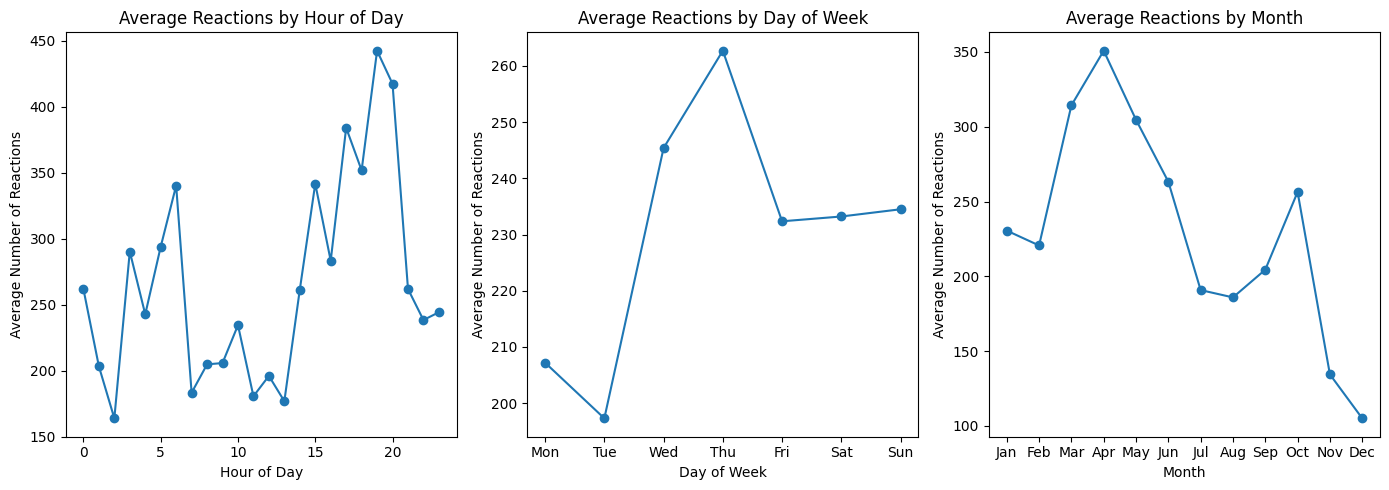

In [1]:
#import Libraries
import pandas as pd
import matplotlib.pyplot as plt

#Load the dataset
df=pd.read_csv('/content/Facebook_Marketplace_data.csv')

#Convert the status_published column to datetime
df['status_published']=pd.to_datetime(df['status_published'])

# Extract hour, day of the week, and month from the status_published column
df['hour']=df['status_published'].dt.hour
df['day_of_week']=df['status_published'].dt.dayofweek
df['month']=df['status_published'].dt.month

# Aggregate the data by hour, day of the week, and month
hourly_reactions=df.groupby('hour')['num_reactions'].mean()
daily_reactions=df.groupby('day_of_week')['num_reactions'].mean()
monthly_reactions=df.groupby('month')['num_reactions'].mean()

# Plot the results
plt.figure(figsize=(14, 5))

plt.subplot(1, 3, 1)
plt.plot(hourly_reactions.index, hourly_reactions.values, marker='o')
plt.title('Average Reactions by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Number of Reactions')

plt.subplot(1, 3, 2)
plt.plot(daily_reactions.index, daily_reactions.values, marker='o')
plt.title('Average Reactions by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Number of Reactions')
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

plt.subplot(1, 3, 3)
plt.plot(monthly_reactions.index, monthly_reactions.values, marker='o')
plt.title('Average Reactions by Month')
plt.xlabel('Month')
plt.ylabel('Average Number of Reactions')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.tight_layout()
plt.show()

Q2

Is there a correlation between the number of reactions (num_reactions) and other engagement metrics such as comments (num_comments) and shares (num_shares)? If so, what is the strength and direction of this correlation?

Ans:

Yes, there is a correlation between the number of reactions, comments, and shares on a social media post.

To quantify the strength and direction of these correlations, we can use statistical methods like:

Pearson correlation coefficient: Measures linear relationships between two continuous variables.

Spearman correlation coefficient: Measures monotonic relationships between two variables, which can be useful if the data is not normally distributed.

In [2]:
# Calculate the Pearson correlation coefficients
correlation_matrix=df[['num_reactions', 'num_comments', 'num_shares']].corr()
print(correlation_matrix)

               num_reactions  num_comments  num_shares
num_reactions       1.000000      0.150843    0.250723
num_comments        0.150843      1.000000    0.640637
num_shares          0.250723      0.640637    1.000000


Interpretation of Correlation Values:

num_reactions and num_comments: The correlation coefficient of 0.150843 indicates a weak positive correlation. This means that there's a slight tendency for posts with more reactions to also have more comments, but the relationship is not very strong.

num_reactions and num_shares: The correlation coefficient of 0.250723 suggests a moderate positive correlation. This indicates a somewhat stronger relationship between reactions and shares, meaning posts with more reactions are generally more likely to be shared.

num_comments and num_shares: The correlation coefficient of 0.640637 shows a strong positive correlation. This implies a clear relationship between comments and shares, suggesting that posts with more comments are more likely to be shared.


Q3

 Use the columns status_type, num_reactions, num_comments, num_shares, num_likes, num_loves, num_wows, num_hahas, num_sads, and num_angrys to train a K-Means clustering model on the Facebook Live Sellers dataset.

**Ans:**

Explanation:

Loading the Dataset: Read the CSV file into a Pandas DataFrame.

Selecting Relevant Columns: Choose the specified columns for clustering.

Preprocessing the Data:
Convert the status_type categorical column to numerical values using one-hot encoding.
Handle missing values by filling them with zeros.
Standardize the data to ensure all features have the same scale.

Optimal Number of Clusters:
Use the elbow method to determine the optimal number of clusters by plotting the inertia (sum of squared distances of samples to their closest cluster center) for different numbers of clusters.

Training the K-Means Model:
Train the K-Means model with the chosen number of clusters (e.g., 4 in this example).
Assign cluster labels to each instance in the dataset.

This process will help to understand the underlying patterns and groupings in the Facebook Live Sellers dataset based on the specified engagement metrics and status types.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

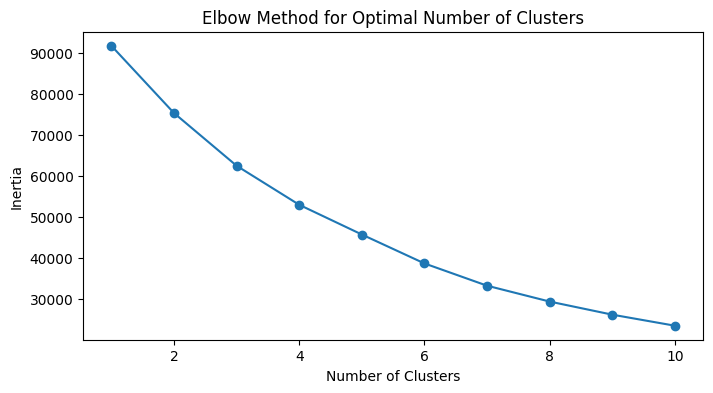



   num_reactions  num_comments  num_shares    num_likes   num_loves  \
0      93.434615     11.810325    1.762565    91.319763    1.275642   
1     168.051442    380.781731   75.147596   142.724519   23.436538   
2    1821.218329     60.824798   10.946092  1815.469003    3.094340   
3     922.153465   3540.534653  564.559406   713.440594  169.465347   

    num_wows  num_hahas  num_sads  num_angrys  status_type_link  \
0   0.543325   0.143507  0.125313    0.024107      1.114396e-02   
1   0.621154   0.890385  0.232692    0.143269     -1.752071e-16   
2   2.433962   0.183288  0.032345    0.005391      3.773585e-02   
3  22.306931  11.678218  3.321782    1.940594      5.204170e-18   

   status_type_photo  status_type_status  status_type_video  
0       9.251763e-01        6.367978e-02      -1.032507e-14  
1       2.753353e-14        1.144917e-15       1.000000e+00  
2       5.579515e-01        2.291105e-01       1.752022e-01  
3       6.435644e-02       -1.318390e-16       9.356436e-0

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [3]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

df=pd.read_csv('/content/Facebook_Marketplace_data.csv')

# Select relevant columns
columns=['status_type', 'num_reactions', 'num_comments', 'num_shares', 'num_likes',
           'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys']
data=df[columns]

# Convert categorical columns to numerical values using one-hot encoding
data=pd.get_dummies(data, columns=['status_type'])

# Handle missing values (if any)
data=data.fillna(0)

# Standardize the data
scaler=StandardScaler()
data_scaled=scaler.fit_transform(data)

# Determine the optimal number of clusters using the elbow method
inertia=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)
print("\n")

# Plot the elbow curve
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

print("\n")
# Train the K-Means model with the optimal number of clusters (let's assume 4)
kmeans=KMeans(n_clusters=4, random_state=42)
df['cluster']=kmeans.fit_predict(data_scaled)

# Analyzing the clusters
cluster_centers=kmeans.cluster_centers_
cluster_centers=scaler.inverse_transform(cluster_centers)

# Add the cluster centers to a DataFrame for better readability
cluster_centers_df=pd.DataFrame(cluster_centers, columns=data.columns)

print(cluster_centers_df)

Q4

Use the elbow method to find the optimum number of clusters.

Ans:

Determining the Optimal Number of Clusters:
Use a loop to train the K-Means model for a range of cluster numbers (1 to 10 in this example).

Append the inertia (sum of squared distances of samples to their closest cluster center) for each number of clusters to a list.

Plotting the Elbow Curve:
The "elbow point" on the curve (where the inertia starts to decrease more slowly) suggests the optimal number of clusters.

By examining the elbow curve, we can identify the point where adding more clusters doesn't significantly reduce the inertia, indicating the optimal number of clusters. This point typically appears as a bend or "elbow" in the plot.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

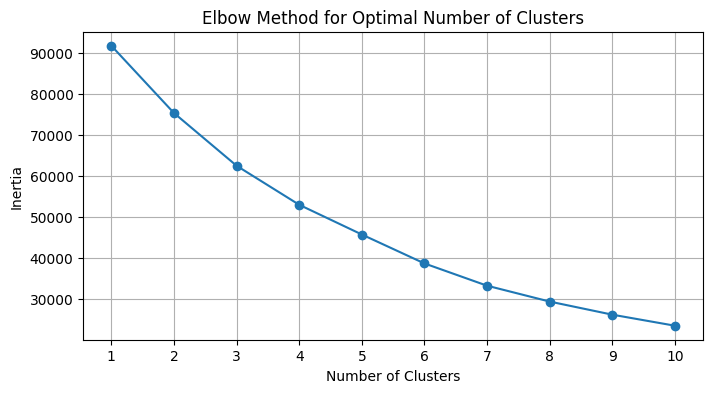

In [4]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Select relevant columns
columns = ['status_type', 'num_reactions', 'num_comments', 'num_shares', 'num_likes',
           'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys']
data = df[columns]

# Convert categorical columns to numerical values using one-hot encoding
data = pd.get_dummies(data, columns=['status_type'])

# Handle missing values (if any)
data = data.fillna(0)

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Determine the optimal number of clusters using the elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)
print("\n")
# Plot the elbow curve
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

Q5

What is the count of different types of posts in the dataset?

Ans:

To count the different types of posts in the dataset, we can use Pandas library to count the occurrences of each unique value in the status_type column.

In [5]:
# Count the different types of posts
post_type_counts = df['status_type'].value_counts()

# Display the counts
print(post_type_counts)


status_type
photo     4288
video     2334
status     365
link        63
Name: count, dtype: int64


The output shows how many posts of each type (video, photo, status, link, etc.) are present in the dataset.

Q6

What is the average value of num_reaction, num_comments, num_shares for each post type?

Ans:

To calculate the average values of num_reactions, num_comments, and num_shares for each post type.First group the data by the status_type column.
and then compute the average values for num_reactions, num_comments, and num_shares for each post type.

In [6]:
# Group by post type and calculate the mean for num_reactions, num_comments, and num_shares
average_values = df.groupby('status_type')[['num_reactions', 'num_comments', 'num_shares']].mean()

# Display the average values
print(average_values)

             num_reactions  num_comments  num_shares
status_type                                         
link            370.142857      5.698413    4.396825
photo           181.290345     15.993470    2.553871
status          438.783562     36.238356    2.558904
video           283.409597    642.478149  115.679949
